# Introduction to DEA Land Cover <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with the `DEA Sandbox` environment
* **Products used:** 
[ga_ls_landcover_class_cyear_2](https://explorer.sandbox.dea.ga.gov.au/ga_ls_landcover_class_cyear_2)


## Background

Land cover is the observed physical cover on the Earth's surface, including trees, shrubs, grasses, soils, exposed rocks, water bodies, plantations, crops and built structures.
Land cover changes for many reasons, including seasonal weather, severe weather events, and human activities.
Remote sensing data recorded over a period of time allows the observation of land cover dynamics.
DEA Land Cover aims to provide a national land cover mapping system that places current land cover status and changes into a historical context at a national, regional and local scale.


### What this product offers

[Digital Earth Australia Land Cover (DEA Land Cover)](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) is a continental dataset that maps  annual land cover classifications for Australia from 1988 to the present. 
DEA Land Cover is at a 25m resolution, meaning each pixel represents a 25m x 25m area on the ground. 
Each pixel shows the predominant land cover condition for the selected year.
The product combines Landsat satellite data and related data products from Geoscience Australia's [Digital Earth Australia](https://www.dea.ga.gov.au/) program. 

DEA Land Cover allows users to analyse land cover over a range of spatial, temporal and thematic scales. 
Scientists, resource managers and policymakers can use the product to support environmental reporting, emergency management, and sustainable natural resource management.

The classification system used in DEA Land Cover follows the Food and Agriculture Organization of the United Nations [land cover classification taxonomy](https://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1036361/), allowing for comparison and integration with other national and international datasets. 
The product defines 6 base land cover classes (`level3`), 7 land cover class descriptors, and a final land cover classification (`level4`) that combines both base classes and class descriptors.
More information about each class can be found further down in this notebook (see **Plotting data**), and on the [DEA Land Cover product details](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat#details) page.

### Applications

Annual land cover information can be used to monitor and manage Australia's environments. These include but are not limited to the following areas in environmental monitoring, the primary industries, and the interests and safety of the Australian community: 

* **Environmental monitoring:** ecosystem mapping, understanding surface water dynamics, erosion management 

* **Primary industries:** understanding crop responses to water availability, understanding and mitigating impact of drought, monitoring vegetation change

* **Community interests:** mapping urban expansion, mapping impacts of natural disasters, bushfire recovery.


### Publications
* Lucas R, Mueller N, Siggins A, Owers C, Clewley D, Bunting P, Kooymans C, Tissott B, Lewis B, Lymburner L, Metternicht G (2019) 'Land Cover Mapping using Digital Earth Australia', <em>Data</em>, 4(4):143, doi: [10.3390/data4040143](https://www.mdpi.com/2306-5729/4/4/143/htm).


* Owers C, Lucas R, Clewley D, Planque C, Punalekar S, Tissott B, Chua S, Bunting P, Mueller N, Metternicht G (2021) 'Living Earth: Implementing national standardised land cover classification systems for Earth Observation in support of sustainable development', <em>Big Earth Data</em>, 5(3):368-390, doi:[10.1080/20964471.2021.1948179](https://www.tandfonline.com/doi/full/10.1080/20964471.2021.1948179?scroll=top&needAccess=true).

> **Note:** For more technical information about DEA Land Cover, visit the official Geoscience Australia [DEA Land Cover product description](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) page.


## Description
This notebook will demonstrate how to load and visualise [DEA Land Cover](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat) data using Digital Earth Australia. Topics covered include:

1. Inspecting available measurements in DEA Land Cover.
2. Choosing and loading DEA Land Cover data for an area of interest.
3. Plotting DEA Land Cover data.

***

## Getting started

To run this analysis, run all the cells in the notebook starting with the 'Load packages' cell. 

### Load packages
Load key Python packages and supporting functions for the analysis.


In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.insert(1, "../Tools/")
from dea_tools.plotting import rgb, display_map
from dea_tools.land_cover import plot_land_cover
from matplotlib import colors as mcolours

### Connect to the datacube

Connect the datacube database, which provides functionality for loading and displaying stored Earth observation data.

In [2]:
dc = datacube.Datacube(app='DEA_Land_Cover')

### View list measurements

We can generate a table listing all of the measurements in DEA Land Cover using the `dc.list_measurements()` function.
The table also shows information about measurement data types, nodata values, and aliases. 
Aliases (e.g. lifeform) can be used instead of the official measurement name (e.g. lifeform_veg_cat_l4a) when loading data (see <strong>Load and view DEA Land Cover data</strong>).


In [3]:
product = "ga_ls_landcover_class_cyear_2"

measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,spectral_definition
measurement,,,,,,,
level3,level3,uint8,1,0,NaN,NaN,NaN
lifeform_veg_cat_l4a,lifeform_veg_cat_l4a,int8,1,0,[lifeform],NaN,NaN
canopyco_veg_cat_l4d,canopyco_veg_cat_l4d,int8,1,0,[vegetation_cover],NaN,NaN
watersea_veg_cat_l4a_au,watersea_veg_cat_l4a_au,int8,1,0,[water_seasonality],NaN,NaN
waterstt_wat_cat_l4a,waterstt_wat_cat_l4a,int8,1,0,[water_state],NaN,NaN
inttidal_wat_cat_l4a,inttidal_wat_cat_l4a,int8,1,0,[intertidal],NaN,NaN
waterper_wat_cat_l4d_au,waterper_wat_cat_l4d_au,int8,1,0,[water_persistence],NaN,NaN
baregrad_phy_cat_l4d_au,baregrad_phy_cat_l4d_au,int8,1,0,[bare_gradation],NaN,NaN
level4,level4,int8,1,0,[full_classification],NaN,NaN


## Select and view your study area

**If running the notebook for the first time,** keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.
The following example loads land cover data for Broome, Western Australia.

In [4]:
# Coordinates for Broome, Western Australia 
lat = -18.10
lon = 122.32
lat_buffer = 0.18
lon_buffer = 0.18

# Combine central coordinates with buffer values to create the latitude and longitude range for the analysis 
lat_range = (lat - lat_buffer, lat + lat_buffer)
lon_range = (lon - lon_buffer, lon + lon_buffer)

# Set the range of dates for the analysis
time_range = ('2017', '2020')

The following cell will display the selected area on an interactive map.
You can zoom in and out to better understand the area you'll be analysing. 
Clicking on any point on the map will reveal that point's latitude and longitude coordinates.

In [5]:
display_map(x=lon_range, y=lat_range)

## Load and view DEA Land Cover data 
The following cell will load data for the `lat_range`, `lon_range` and `time_range` we defined above.
We can do this using the `dc.load()` function. 

> **Note:** The following cell loads all available measurements in DEA Land Cover, however, the query can be adapted to only load measurements of interest.

In [21]:
# Create the 'query' dictionary object, which contains the longitudes, latitudes and time defined above
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             output_crs='EPSG:3577',
             measurements=['level3', 'lifeform', 'vegetation_cover', 'water_seasonality',
                           'water_state', 'intertidal', 'water_persistence', 
                           'bare_gradation', 'full_classification'],
             resolution=(25, -25),
             **query)

We can now view the data. 
The measurements listed under `Data variables` should match the measurements listed in the above query.

More information on interpreting `xarray.Dataset` results can be found in our [Beginner's guide](https://docs.dea.ga.gov.au/notebooks/Beginners_guide/04_Loading_data.html#Interpreting-the-resulting-xarray.Dataset).

In [22]:
lc

<xarray.Dataset>
Dimensions:              (time: 4, y: 1705, x: 1641)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-01 ... 2020-01-01
  * y                    (y) float64 -1.993e+06 -1.993e+06 ... -1.951e+06
  * x                    (x) float64 -1.003e+06 -1.003e+06 ... -1.044e+06
    spatial_ref          int32 3577
Data variables:
    level3               (time, y, x) uint8 112 112 112 112 ... 220 220 220 220
    lifeform             (time, y, x) int8 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0
    vegetation_cover     (time, y, x) int8 13 13 13 13 13 13 13 ... 0 0 0 0 0 0
    water_seasonality    (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    water_state          (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
    intertidal           (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    water_persistence    (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
    bare_gradation       (time, y, x) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    full_classification  (time, y, x) int8 34 34 34 34 34 ... 101 101 101 101
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plotting data

The following section will show you how to plot DEA Land Cover data using 2 different methods: the `plot_layer()` function that allows you to define your own colour map, and the `plot_land_cover()` function that uses DEA standard colour maps. 

### Level 3 visualisation 

The Level 3 classification contains 6 base classes: 

* <strong>111: Cultivated terrestrial vegetation</strong>  
Cultivated vegetation is vegetation that has been changed by human influence, such as planted crops or improved pasture. This is different from areas left to minor grazing or fallow.
* <strong>112: Natural terrestrial vegetation</strong>  
Natural vegetation is vegetation that has not been changed by human influence. This includes native forests as well as pastures or paddocks left unchanged for the year. It does not identify whether the vegetation is native or otherwise.
* <strong>124: Natural aquatic vegetation</strong>  
Aquatic vegetation is vegetation that gets regularly inundated with water. The main type of aquatic vegetation feature in DEA Land Cover is mangroves.
* <strong>215: Artificial surface</strong>  
Artificial surfaces are human-made, unvegetated areas. This includes the roofs of houses, concrete areas, road surfaces and other similar surfaces that we associate with civilisation.
* <strong>216: Natural bare surface</strong>  
Natural bare surface is mostly soil. It is very likely that there is still vegetation in the area, but it is dominated by soil.
* <strong>220: Water</strong>  
Water captures terrestrial and coastal open water such as dams, lakes, large rivers and the coastal and near-shore zone. 


To plot the `level3` data, we will use the `plot_layer()` function. 
The `plot_layer()` function allows you to define your own colour map as shown in the cell below. 
The keys respond to the Level 3 classifications, and the values are colour specifications (red, green, blue, alpha) and descriptions to be used in the legend.

In [8]:
# Define a colour scheme for the Level 3 
LEVEL3_COLOUR_SCHEME = { 0   : (255, 255, 255, 255, "No Data"),
                         111 : (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
                         112 : (14, 121, 18, 255, "Natural terrestrial vegetation"),
                         124 : (30, 191, 121, 255, "Natural aquatic vegetation"),
                         215 : (218, 92, 105, 255, "Artificial surface"),
                         216 : (243, 171, 105, 255, "Natural bare surface"),
                         220 : (77, 159, 220, 255, "Water")}

The following cell defines the `plot_layer()` function which takes DEA Land Cover data and a colour map as arguments.

In [9]:
# Plot layer from colour map
def plot_layer(colours, data):
    colour_arr = []
    cblabels = []
    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2])/255)
        cblabels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours)
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds)-0.1, cmap.N)

    # Plot the provided layer
    im = data.plot(cmap=cmap, norm=norm, add_colorbar=True, col='time', col_wrap=4, size=5)

    cb = im.cbar
    ticks = cb.get_ticks()
    cb.set_ticks(ticks + np.diff(ticks, append=256)/2)
    cb.set_ticklabels(cblabels)    
    
    return im

We can now plot the data: 

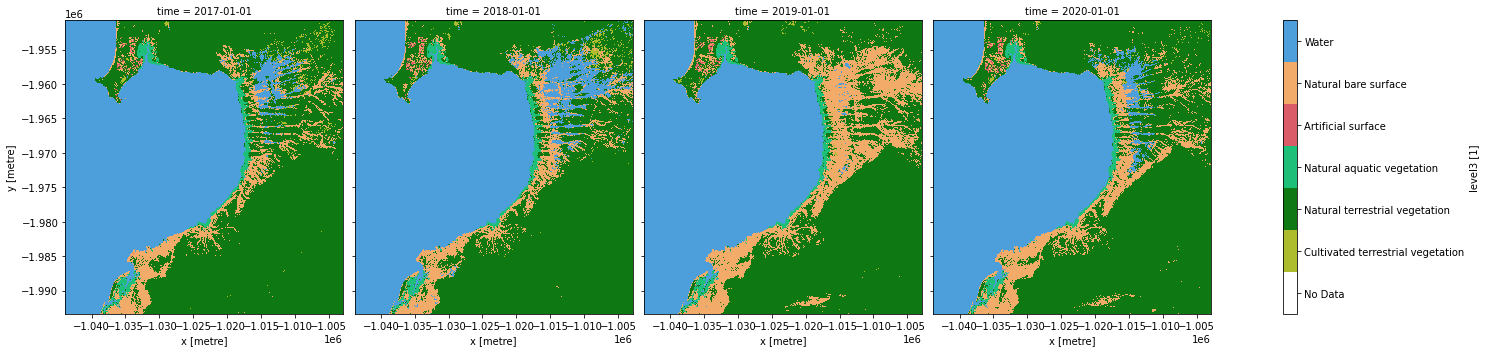

In [10]:
plot_layer(LEVEL3_COLOUR_SCHEME, lc.level3)

In the following sections, we will plot data using the `plot_land_cover()` function. More details about the function can be found in the [DEA tools directory]().

### Visualising class descriptors 

There are 7 class descriptors in DEA Land Cover: lifeform, vegetation cover, water seasonality, water state, intertidal area, water persistence, and bare gradation. 

The following section provides more detail about each class descriptor, then uses the `plot_land_cover()` function to visualise them. 

#### Lifeform

The lifeform class descriptor describes the predominant vegetation type in vegetated areas.
It is categorised as follows: 

* 0: No data or not vegetated 
* 1: Woody vegetation (trees, shrubs)
* 2: Herbaceous vegetation (grasses, forbs)

Lifeform provides detail to the following Level 3 classes: cultivated terrestrial vegetation (111), natural terrestrial vegetation (112), and natural aquatic vegetation (124).

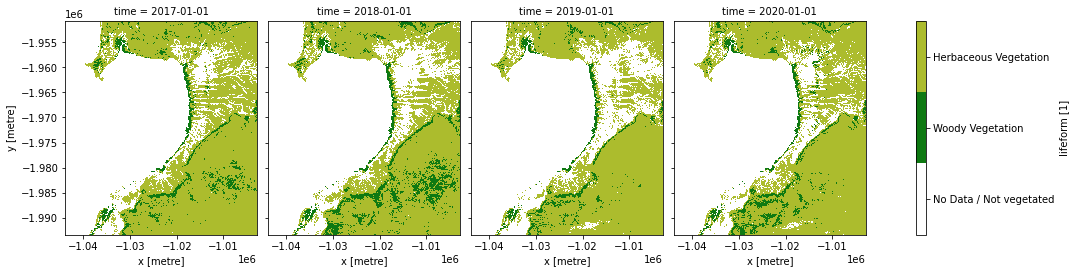

In [11]:
plot_land_cover(lc.lifeform)

#### Vegetation cover

The vegetation cover class descriptor describes the percentage of cover in vegetated areas. 
It is categorised as follows: 

* 0: Not applicable (such as in bare areas)
* 10: Closed (>65%)  
* 12: Open (40 to 65%)  
* 13: Open (15 to 40%)  
* 15: Sparse (4 to 15%)  
* 16: Scattered (1 to 4%)  

Vegetation cover provides detail to the following Level 3 classes: cultivated terrestrial vegetation (111), natural terrestrial vegetation (112), and natural aquatic vegetation (124). 

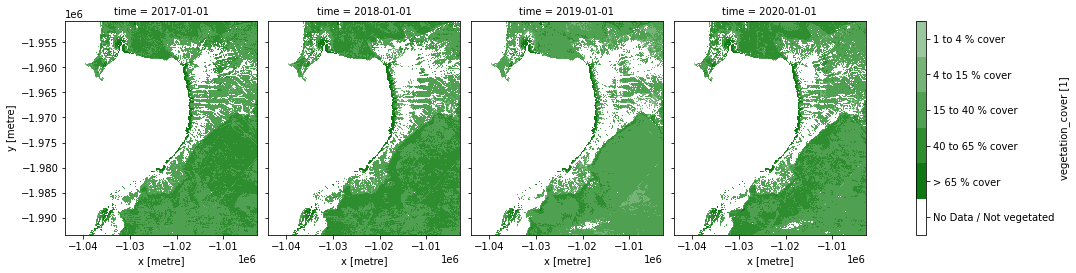

In [12]:
plot_land_cover(lc.vegetation_cover)

#### Water seasonality

Water seasonality describes the length of time an aquatic vegetated area was measured as being inundated.
It is categorised as follows: 

* 0: No data or not an aquatic environment 
* 1: Semi-permanent or permanent (> 3 months)  
* 2: Temporary or seasonal (< 3 months)  

Water seasonality provides detail to the following Level 3 class: natural aquatic vegetation class (124).


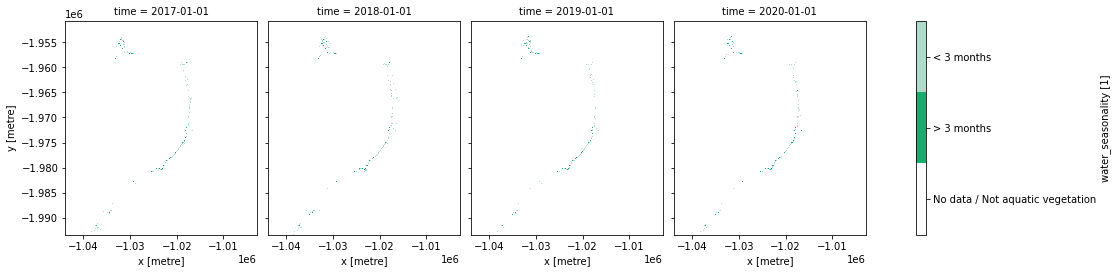

In [13]:
plot_land_cover(lc.water_seasonality)

As water seasonlity only relates to wet vegetation, it's hard to see the seasonality changes at this scale. 
We can easily 'zoom in' a little to see more detail. 

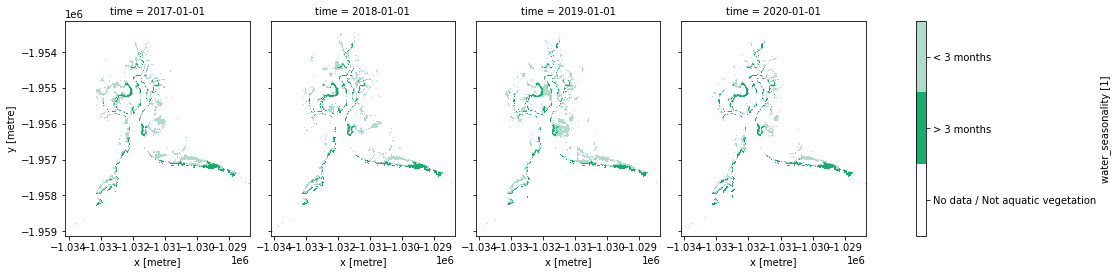

In [14]:
plot_land_cover(lc.water_seasonality[:,1370:1610,1020:1250])

#### Water state

Water state describes whether the detected water is snow, ice or liquid water. 
It is categorised as follows:

* 0: No data or not water 
* 1: Water 
    
Water state provides detail to the following Level 3 class: water (220).

> **Note:** Only liquid water is described in this release.

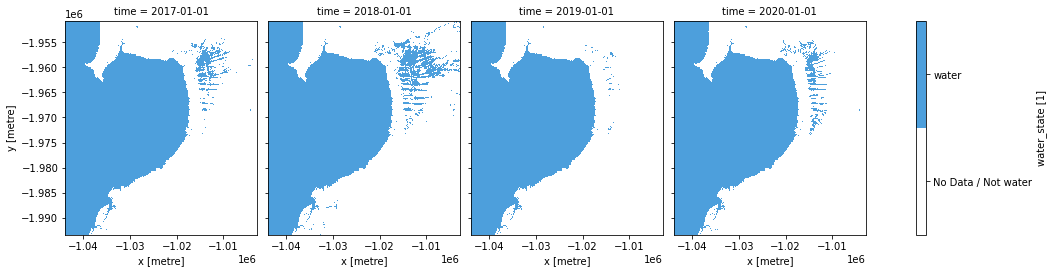

In [15]:
plot_land_cover(lc.water_state)

#### Intertidal 

The intertidal class descriptor delineates the intertidal zone.
It is categorised as follows:

* 0: No data or not intertidal  
* 3: Intertidal zone  

The intertidal class provides detail to the following Level 3 class: water (220). 

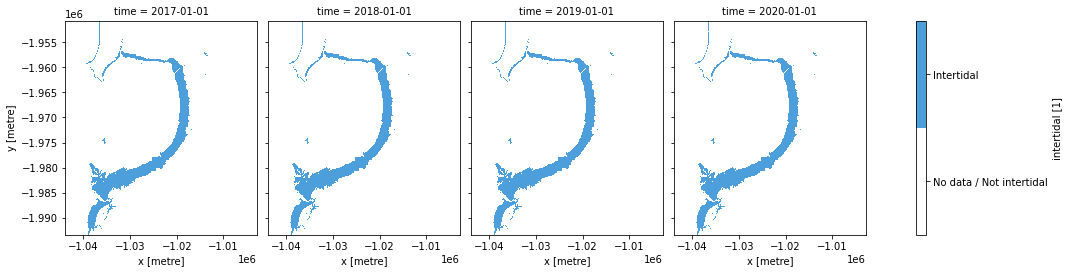

In [16]:
plot_land_cover(lc.intertidal)

#### Water persistence 

Water persistence describes the number of months a water body contains water.
It is categorised as follows:

* 0: No data or not water
* 1: > 9 months  
* 7: 7-9 months  
* 8: 4-6 months  
* 9: 1-3 months  

Water persistence provides detail to the following Level 3 class: water (220).

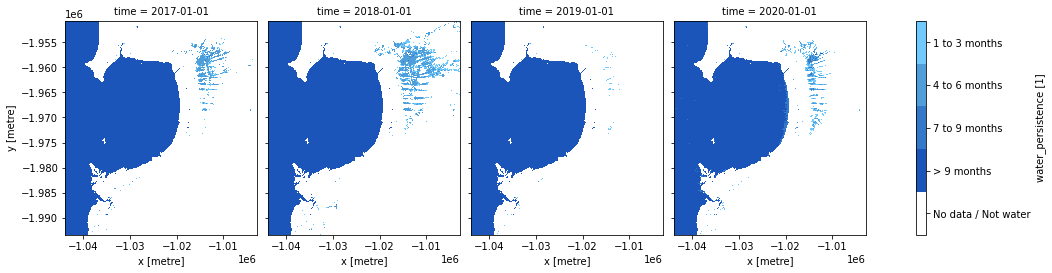

In [17]:
plot_land_cover(lc.water_persistence)

#### Bare gradation

Bare gradation describes the percentage of bare cover in naturally bare areas.
It is categorised as follows: 

* 0: No data or not a natural bare surface
* 10: Sparsely vegetated (< 20 % bare) 
* 12: Very sparsely vegetated (20 to 60 % bare) 
* 15: Bare areas, unvegetated (> 60 % bare)

Bare gradation provides detail to the following Level 3 class: natural bare surface (216).

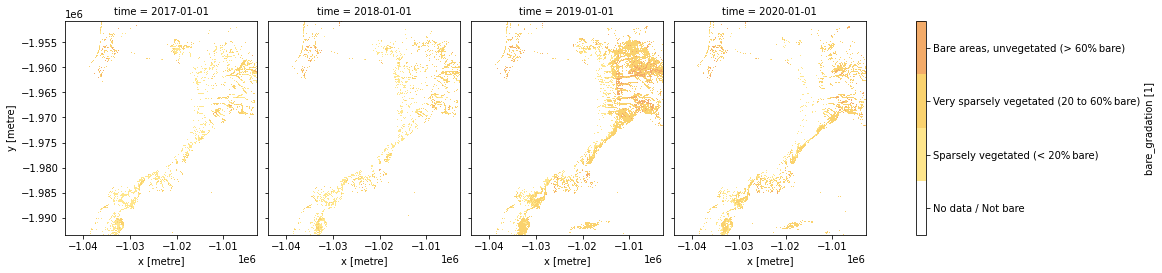

In [18]:
plot_land_cover(lc.bare_gradation)

### Level 4 visualisation

The Level 4 classification combines the Level 3 classes with the 7 class descriptors. 
For the full list of classification values, visit [DEA Land Cover product details](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat#details).

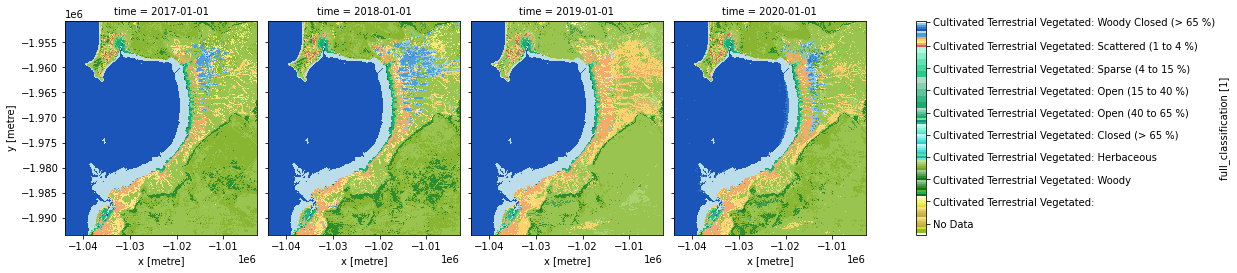

In [19]:
plot_land_cover(lc.full_classification)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** January 2021

**Compatible datacube version:** 

In [20]:
print(datacube.__version__)

1.8.6


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)